In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'E:\Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
data = data.drop(["Serial No."],axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


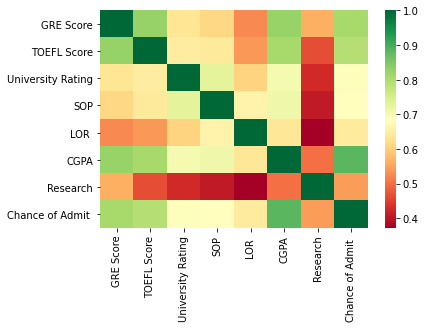

In [3]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='RdYlGn')

In [4]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [5]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
X = data.drop(['Chance of Admit '],axis=1)
y = data['Chance of Admit ']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.linear_model import Lasso
ls = Lasso()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()


In [11]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [12]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(lr.score(X_test,y_test))


0.0037046553987884097
0.06086588041578311
0.042722654277053664
0.8188432567829629


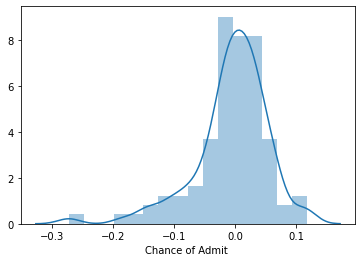

In [13]:
sns.distplot(y_test-y_pred)

In [14]:
ls.fit(X_train,y_train)
y_pred1 = ls.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred1))
print(math.sqrt(mean_squared_error(y_test, y_pred1)))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred1))
print(ls.score(X_test,y_test))


0.015226971613324213
0.12339761591426397
0.09777992929911129
0.2554048110843906


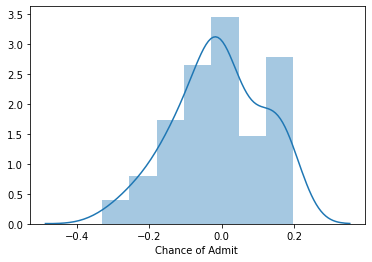

In [16]:
sns.distplot(y_test-y_pred1)

In [17]:
rfr.fit(X_train,y_train)
y_pred2 = rfr.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred2)*100)
print(math.sqrt(mean_squared_error(y_test, y_pred2))*100)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred2))
print(rfr.score(X_test,y_test))


0.4560214400000001
6.752935954086935
0.04529200000000001
0.777006630806846


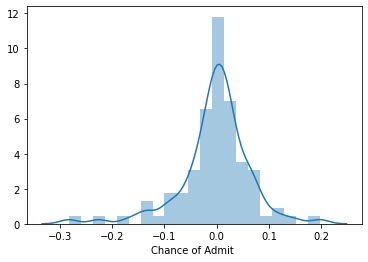

In [19]:
sns.distplot(y_test-y_pred2)

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
np.linspace(start=100,stop=1200,num=12)
np.linspace(start=5,stop=30,num=6)

array([ 5., 10., 15., 20., 25., 30.])

In [22]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
max_features = ['auto','sqrt']

In [23]:
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
    
}

In [24]:
rfr1 = RandomizedSearchCV(estimator=rfr,param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter=10,cv = 10,n_jobs=1,verbose=2)

In [25]:
rfr1.fit(X_train,y_train)
predd = rfr1.predict(X_test)
# print(mean_squared_error(y_test, y_pred2))
# print(math.sqrt(mean_squared_error(y_test, y_pred2)))
# from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(y_test, y_pred2))
print(rfr1.score(X_test,y_test))


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=5

[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1100, min_sample

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=900, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


-0.003778551104124183


In [26]:
rfr1.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
print(mean_squared_error(y_test, predd)*100)
print(math.sqrt(mean_squared_error(y_test, predd))*100)

0.3778551104124183
6.14699203198132


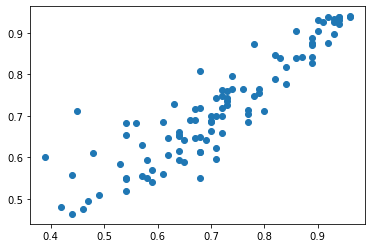

In [29]:
plt.scatter(y_test,predd)

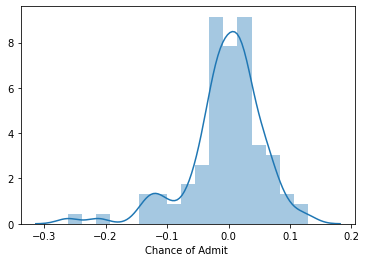

In [30]:
sns.distplot(y_test-predd)

In [31]:
import pickle
pickle.dump(rfr,open('admission.pkl','wb'))
model1 = pickle.load(open('admission.pkl','rb'))

In [32]:
pickle.dump(rfr1,open('admissions.pkl','wb'))

In [33]:
model = pickle.load(open('admissions.pkl','rb'))

In [34]:
model.predict([[334,82,4,4.5,4.5,8,1]])

array([0.71077754])

In [35]:
model.predict([[337,119,4,4.5,4.5,9.5,0]])

array([0.91993092])

In [36]:
model.predict([[325,115,3,5.5,2.5,8.67,1]])

array([0.78052324])

In [37]:
model.predict([[337,119,4,4.5,4.5,9.5,1]])

array([0.93751836])